<a href="https://colab.research.google.com/github/moze90/Thesis2022/blob/main/Thesis_2022_Newdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from glob import glob
import re
import gc
import csv
from scipy.stats import zscore
from datetime import datetime
from pandas.io.parsers.readers import read_csv
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**DATA PREPROCESSING**

# **new EQ**

**First step:removing null values**

In [3]:
df1=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/eq.csv")

In [4]:
 data1= pd.read_csv(df1,sep=';',header=0,parse_dates=True)

In [5]:
data1.head(1)

,InvNr,InkDat,Skrotad,flReplacementCost,flPurchaseCost,SkrotDatum,ID,PMLMaintenanceRequirementID,PMLMissionCriticalID,PMLRiscID,...,Modell,Handelsnamn,intRisktal,strRiscName,intRiscSeverityLevel,FUSenaste,FUIntNasta,PMLMaintenanceRequirementDescription,PMLMissionCriticalDescription,PMLRiscDescription
0,C951-01,2001-01-01 00:00:00.000,2,0,33210,NaN,68263,NaN,NaN,NaN,...,Wolf 5512,NaN,20.0,20,20.0,2004-06-15 00:00:00.000,NaN,NaN,NaN,NaN


In [6]:
data1.isnull().sum()

InvNr                                     2344
InkDat                                   13883
Skrotad                                      0
flReplacementCost                        65477
flPurchaseCost                            6997
SkrotDatum                              129351
ID                                           0
PMLMaintenanceRequirementID             226918
PMLMissionCriticalID                    226943
PMLRiscID                               226946
Benamn                                    2025
Fabrikat                                  2099
Modell                                    2150
Handelsnamn                             224409
intRisktal                                9497
strRiscName                               9497
intRiscSeverityLevel                      9497
FUSenaste                               146508
FUIntNasta                              178383
PMLMaintenanceRequirementDescription    226918
PMLMissionCriticalDescription           226943
PMLRiscDescri

In [7]:
fin=data1.drop(columns=['intRiscSeverityLevel','Skrotad','flReplacementCost','flPurchaseCost','PMLMaintenanceRequirementID','PMLMissionCriticalID','PMLRiscID','strRiscName','Handelsnamn','PMLMaintenanceRequirementDescription','PMLMissionCriticalDescription','PMLRiscDescription','FUSenaste','FUIntNasta'])

In [8]:
fin.head(4)

,InvNr,InkDat,SkrotDatum,ID,Benamn,Fabrikat,Modell,intRisktal
0,C951-01,2001-01-01 00:00:00.000,NaN,68263,Endoskop,Wolf,Wolf 5512,20.0
1,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
2,111444,2005-01-01 00:00:00.000,NaN,86743,Endoskop,Wolf,Wolf 5512,20.0
3,9013559,2008-01-01 00:00:00.000,NaN,140398,Ljuskälla f endoskop,Wolf,4015,13.0


In [9]:
dict = {'FUSenaste': 'prevPm',
        'FUIntNasta': 'nexPm',
        'InkDat':'Equip.reg_date',
        'SkrotDatum':'Scrapped_date',
        'Benamn':'dev',
      'Fabrikat':'Brand',
        'Modell':'Model',
        'intRisktal':'calc.Risk'}

In [10]:
fin.rename(columns=dict,inplace=True)

In [11]:
len(fin)

227003

**substitute scrapped null values with data collection**

In [12]:
fin.isnull().sum()

InvNr               2344
Equip.reg_date     13883
Scrapped_date     129351
ID                     0
dev                 2025
Brand               2099
Model               2150
calc.Risk           9497
dtype: int64

In [13]:
dict1 = {'InkDat': 'Equip.reg_date',
        'SkrotDatum': 'Scrapped_date',
        'Benamn':'dev',
        'Fabrikat':'Brand',
        'Modell':'Model',
        'intRisktal':'cal.Risk'}

In [14]:
fin.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
0,C951-01,2001-01-01 00:00:00.000,NaN,68263,Endoskop,Wolf,Wolf 5512,20.0
1,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
2,111444,2005-01-01 00:00:00.000,NaN,86743,Endoskop,Wolf,Wolf 5512,20.0


In [15]:
fin.dropna(inplace=True)

In [16]:
fin.shape

(83584, 8)

In [17]:
fin.set_index('ID',inplace=True,drop=False)

In [18]:
fin.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
ID,,,,,,,,
68264,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
112347,P384,1981-01-01 00:00:00.000,2012-07-19 00:00:00.000,112347,Ljuskälla f endoskop,Wolf,4015,31.0
88325,C0297,1985-01-01 00:00:00.000,2015-12-16 00:00:00.000,88325,Ljuskälla f endoskop,Wolf,4015,31.0


# ***pm***

In [19]:
df3=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm.csv")

In [20]:
fin3=read_csv(df3,sep=';')

In [21]:
fin3.head(3)

,Id,EquipmentId,NextPM,LastPM,Interval,IsRecurring
0,7838,17635.0,2007-01-01 00:00:00.000,2006-01-12 00:00:00.000,12 Månader,1
1,27837,65129.0,2003-06-15 00:00:00.000,2001-06-15 00:00:00.000,24 Månader,1
2,27838,65130.0,2007-07-01 00:00:00.000,2005-07-25 00:00:00.000,24 Månader,1


In [22]:
fin3.isnull().sum()

Id                 0
EquipmentId     4081
NextPM          4921
LastPM         47521
Interval       13329
IsRecurring        0
dtype: int64

In [23]:
len(fin3)

117291

In [24]:
fin3.dropna(inplace=True)

In [25]:
len(fin3)

68762

In [26]:
fin3.isnull().sum()

Id             0
EquipmentId    0
NextPM         0
LastPM         0
Interval       0
IsRecurring    0
dtype: int64

In [27]:
fin3.count()

Id             68762
EquipmentId    68762
NextPM         68762
LastPM         68762
Interval       68762
IsRecurring    68762
dtype: int64

In [28]:
fin3.set_index('EquipmentId',drop=False)

,Id,EquipmentId,NextPM,LastPM,Interval,IsRecurring
EquipmentId,,,,,,
17635.0,7838,17635.0,2007-01-01 00:00:00.000,2006-01-12 00:00:00.000,12 Månader,1
65129.0,27837,65129.0,2003-06-15 00:00:00.000,2001-06-15 00:00:00.000,24 Månader,1
65130.0,27838,65130.0,2007-07-01 00:00:00.000,2005-07-25 00:00:00.000,24 Månader,1
65131.0,27839,65131.0,2006-06-01 00:00:00.000,2004-06-01 00:00:00.000,24 Månader,1
65132.0,27840,65132.0,2003-06-26 00:00:00.000,2001-06-26 00:00:00.000,24 Månader,1
...,...,...,...,...,...,...
305222.0,253852,305222.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1
305223.0,253853,305223.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1
305224.0,253854,305224.0,2022-09-01 00:00:00.000,2021-09-01 00:00:00.000,12 Månader,1


# **pm data**

In [29]:
df2=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_data.csv")

In [30]:
fin1=read_csv(df2,sep=';',names=['invID','last_pm','first_pm','count_pm','meantime_pm'])

In [31]:
len(fin1)

80503

In [32]:
fin1.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
0,204282,2020-03-04,2009-03-31,11,362
1,255222,2021-06-28,2018-03-20,4,299
2,208527,2015-06-22,2015-06-22,1,0


In [33]:
fin1.isnull().sum()

invID          0
last_pm        0
first_pm       0
count_pm       0
meantime_pm    0
dtype: int64

In [34]:
fin1.isnull().sum()

invID          0
last_pm        0
first_pm       0
count_pm       0
meantime_pm    0
dtype: int64

In [35]:
fin1.count()

invID          80503
last_pm        80503
first_pm       80503
count_pm       80503
meantime_pm    80503
dtype: int64

In [36]:
fin1.set_index('invID',drop=False,inplace=True)

In [37]:
fin1.head(3)

,invID,last_pm,first_pm,count_pm,meantime_pm
invID,,,,,
204282,204282,2020-03-04,2009-03-31,11,362
255222,255222,2021-06-28,2018-03-20,4,299
208527,208527,2015-06-22,2015-06-22,1,0



# pm **history**

In [38]:
df4=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_history.csv")

In [39]:
fin4=read_csv(df4,sep=';')

In [40]:
fin4.head(3)

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,1,24.0,2.0,NaN,NaN,NaN,2001-06-15,2003-06-15,65129,NaN,0.0,1,3579
1,2011-04-03,28001,1,24.0,2.0,NaN,NaN,NaN,2004-03-17,2006-03-17,65375,NaN,0.0,1,2573
2,2011-04-03,28245,1,12.0,2.0,NaN,NaN,NaN,2003-07-11,2004-07-11,65657,NaN,0.0,1,2823


In [41]:
fin4.shape

(268519, 15)

In [42]:
fin4.isnull().sum()

(No column name)                         0
ID                                       0
blnRecurring                             0
intTimeInterval                      29965
PM_TimeIntervalUnitID                29639
intTimeIntervalRecommended          243017
PM_TimeIntervalUnitIDRecommended    194394
intEstimatedPMTimeHours             196105
(No column name).1                       0
(No column name).2                   84728
InventarierID                            0
ArborderID                           28826
blnHiddenPMClock                      5605
DeviatingTimeIntervalRecommended         0
PM_diff                                  0
dtype: int64

we need to study devices which have recurring pm activities

In [43]:
fin4['blnRecurring'].value_counts()

1    236686
0     31833
Name: blnRecurring, dtype: int64

In [44]:
recurring_hos1=fin4.loc[fin4['blnRecurring']== 1]

In [45]:
recurring_hos1.shape

(236686, 15)

now that we have got only the devices with recurring pm activities , we need to drop all irrelevent columns before translating the rest of the columns 

In [46]:
recurring_hos1.drop(columns=['blnRecurring','intTimeIntervalRecommended','intEstimatedPMTimeHours','(No column name).1','(No column name).2','blnHiddenPMClock'],inplace=True)

In [47]:
recurring_hos1

,(No column name),ID,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
1,2011-04-03,28001,24.0,2.0,NaN,65375,NaN,1,2573
2,2011-04-03,28245,12.0,2.0,NaN,65657,NaN,1,2823
3,2011-04-03,28739,12.0,2.0,NaN,66297,NaN,1,4065
4,2011-04-03,28982,12.0,2.0,NaN,66601,NaN,1,3432
...,...,...,...,...,...,...,...,...,...
268514,2020-08-31,111399,12.0,2.0,NaN,139137,1322680.0,0,0
268515,2020-08-31,218051,175.0,3.0,NaN,265560,1311557.0,0,66
268516,2020-08-31,218145,175.0,3.0,NaN,266504,1311608.0,0,66
268517,2020-08-31,218142,175.0,3.0,NaN,266501,1311605.0,0,66


# WO

In [48]:
df6=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/wo.csv")

In [49]:
dic={'ID':'ID','AORegDat':'issued','AOKlarDat':'Completed','AOEKlarDat':'fin_com','InventarieID':'InventarieID'}

In [50]:
fin6=read_csv(df6,sep=';')

In [51]:
fin6.rename(columns=dic,inplace=True)

In [52]:
fin6.query("InventarieID==	220059.0")

,ID,issued,Completed,AOEkKlarDat,InventarieID
6,818112,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220059.0
1143,819249,2004-02-23 00:00:00.000,2004-02-23 00:00:00.000,2004-02-23 00:00:00.000,220059.0
1995,820015,2005-02-23 00:00:00.000,2005-02-25 00:00:00.000,2005-02-25 00:00:00.000,220059.0


In [53]:
fin6.head(10)

,ID,issued,Completed,AOEkKlarDat,InventarieID
0,818106,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,NaN
1,818107,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,216932.0
2,818108,2002-10-18 00:00:00.000,2002-10-18 00:00:00.000,2002-10-31 00:00:00.000,217277.0
3,818109,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,217216.0
4,818110,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,219927.0
5,818111,2002-10-17 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,218729.0
6,818112,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220059.0
7,818113,2002-10-22 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,220047.0
8,818114,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,216556.0
9,818115,2002-10-18 00:00:00.000,2002-10-21 00:00:00.000,2002-10-22 00:00:00.000,218743.0


In [54]:
fin6.isnull().sum()

ID                   0
issued               4
Completed        21108
AOEkKlarDat      23733
InventarieID    344980
dtype: int64

In [55]:
fin6.dropna(inplace=True)

In [56]:
fin6.shape

(749942, 5)

In [57]:
fin6.set_index('InventarieID',inplace=True,drop=False)

In [58]:
fin6.head(3)

,ID,issued,Completed,AOEkKlarDat,InventarieID
InventarieID,,,,,
216932.0,818107,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,2002-10-16 00:00:00.000,216932.0
217277.0,818108,2002-10-18 00:00:00.000,2002-10-18 00:00:00.000,2002-10-31 00:00:00.000,217277.0
217216.0,818109,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,2002-10-21 00:00:00.000,217216.0


In [59]:
#sorting the dataframe based on the inventarieID descedning order
fin6=fin6.sort_index()


In [60]:
fin6.iloc[[101]]

,ID,issued,Completed,AOEkKlarDat,InventarieID
InventarieID,,,,,
1365.0,599981,2015-09-14 00:00:00.000,2015-09-16 00:00:00.000,2015-09-16 00:00:00.000,1365.0


# **wo data**

In [61]:
df7=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/WO_data.csv")

In [62]:
fin7=pd.read_csv(df7,sep=';',names=['inventarieID','last_wo','first_wo','Count_wo','meantime'])


In [63]:
fin7.head(3)

,inventarieID,last_wo,first_wo,Count_wo,meantime
0,119121.0,2017-05-09,2010-11-03,4,594
1,232669.0,2012-06-14,2012-06-14,1,0
2,140369.0,2013-08-20,2013-08-20,1,0


In [64]:
fin7.dropna(inplace=True)

In [65]:
fin7.shape

(126982, 5)

In [66]:
fin7.set_index('inventarieID',inplace=True,drop=False)

In [67]:
fin7.head(3)

,inventarieID,last_wo,first_wo,Count_wo,meantime
inventarieID,,,,,
119121.0,119121.0,2017-05-09,2010-11-03,4,594
232669.0,232669.0,2012-06-14,2012-06-14,1,0
140369.0,140369.0,2013-08-20,2013-08-20,1,0


# **Connecting recurring hospital pm history data with equipment data to query based on specific devices**

In [68]:
recurring_hos1.set_index('InventarierID',inplace=True,drop=False)

In [69]:
recurring_hos1.head(3)

,(No column name),ID,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
InventarierID,,,,,,,,,
65129,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
65375,2011-04-03,28001,24.0,2.0,NaN,65375,NaN,1,2573
65657,2011-04-03,28245,12.0,2.0,NaN,65657,NaN,1,2823


In [70]:
pmhist_eq=pd.merge(fin,recurring_hos1,left_index=True,right_index=True)

In [71]:
pmhist_eq.shape

(86612, 17)

In [72]:
deviate_hos1=pmhist_eq.loc[pmhist_eq['DeviatingTimeIntervalRecommended'] == 1]

In [73]:
deviate_hos1

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
17500,9004181,2007-01-01 00:00:00.000,2013-11-13 00:00:00.000,17500,Lungröntgenlab,Fuji,Velocity,31.0,2011-02-28,7800,12.0,2.0,NaN,17500,NaN,1,4112
17635,R1273-01,1998-01-01 00:00:00.000,2009-12-15 00:00:00.000,17635,Undersökningsstativ/system,Siemens,Siemens Symphony,31.0,2011-02-28,7838,12.0,2.0,NaN,17635,NaN,1,1873
65129,C105-66,1991-01-01 00:00:00.000,2003-12-15 00:00:00.000,65129,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27837,24.0,2.0,NaN,65129,NaN,1,3579
65130,C105-67,1991-01-01 00:00:00.000,2006-04-03 00:00:00.000,65130,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27838,24.0,2.0,NaN,65130,NaN,1,2078
65131,C105-68,1991-01-01 00:00:00.000,2006-08-21 00:00:00.000,65131,Infusionspump,Cardinal Health,IVAC 561,31.0,2011-04-03,27839,24.0,2.0,NaN,65131,NaN,1,2497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252318,000887,2009-12-12 00:00:00.000,2012-08-29 00:00:00.000,252318,Projektor,LG,DX630,31.0,2012-02-16,1590757,6.0,2.0,NaN,252318,1160730.0,1,0
252318,000887,2009-12-12 00:00:00.000,2012-08-29 00:00:00.000,252318,Projektor,LG,DX630,31.0,2012-02-16,1590787,6.0,2.0,NaN,252318,1160731.0,1,0
252599,002523,2012-02-23 00:00:00.000,2016-11-07 00:00:00.000,252599,"Dator, bärbar/surfplatta (Medical grade)",Dell,Latitude E6320,31.0,2016-11-07,1590800,12.0,2.0,2.0,252599,1160873.0,1,0
252706,002531,2012-09-13 00:00:00.000,2021-05-31 00:00:00.000,252706,"Dator, bärbar/surfplatta (Medical grade)",Dell,Latitude E6230,31.0,2016-02-09,1590775,12.0,2.0,NaN,252706,1160880.0,1,0


In [74]:
deviate_hos1.drop(columns=['DeviatingTimeIntervalRecommended'],inplace=True)

In [75]:
deviate_hos1.shape

(75186, 16)

In [76]:
non_deviatehos1=pmhist_eq.loc[pmhist_eq['DeviatingTimeIntervalRecommended']==0]

In [77]:
non_deviatehos1

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,intTimeInterval,PM_TimeIntervalUnitID,PM_TimeIntervalUnitIDRecommended,InventarierID,ArborderID,DeviatingTimeIntervalRecommended,PM_diff
39879,9004189,2008-01-01 00:00:00.000,2021-09-21 00:00:00.000,39879,"Ultraljudssystem, bildgivande universellt",Acuson,Sequoia 512,18.0,2021-03-05,220794,12.0,2.0,NaN,39879,1360473.0,0,0
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2021-09-06,216789,6.0,2.0,NaN,41575,1398455.0,0,33
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2020-08-13,216789,12.0,2.0,NaN,41575,1320087.0,0,0
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2020-05-05,216789,12.0,2.0,NaN,41575,1300740.0,0,266
41575,9045655,2011-01-01 00:00:00.000,2021-12-20 00:00:00.000,41575,"Röntgensystem för benabsorptionsmätning, dubbe...",Hologic,Discovery A,16.0,2021-02-22,216789,6.0,2.0,NaN,41575,1357755.0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300077,1984-881,2019-08-14 00:00:00.000,2022-02-17 00:00:00.000,300077,Termometer öron IR,Braun,ThermoScan Pro 6000,13.0,2022-02-17,236157,12.0,2.0,2.0,300077,1426779.0,0,0
301900,351114,2001-03-04 00:00:00.000,2021-10-05 00:00:00.000,301900,Patientsäng el,Proton Caretec,10101,6.0,2021-07-13,241464,12.0,2.0,NaN,301900,1387727.0,0,0
301957,351171,2008-04-24 00:00:00.000,2021-10-05 00:00:00.000,301957,Patientsäng el,Proton Caretec,17603,6.0,2021-08-06,241122,12.0,2.0,NaN,301957,1392348.0,0,69
301957,351171,2008-04-24 00:00:00.000,2021-10-05 00:00:00.000,301957,Patientsäng el,Proton Caretec,17603,6.0,2021-08-17,241122,12.0,2.0,NaN,301957,1394217.0,0,81


In [78]:
non_deviatehos1.shape

(11426, 17)

query our usual devices from those lists of deviated and non-deviated 

**patient monitor**

In [79]:
dev_pa=deviate_hos1.query("dev == 'Patientmonitor multiparameter'")

In [80]:
dev_pa.shape

(6053, 16)

In [81]:
nondev_pa=non_deviatehos1.query("dev =='patientmonitor multiparameter'")

In [82]:
nondev_pa.shape

(0, 17)

**anathesai**

In [83]:
data50=deviate_hos1.query("dev == 'Anestesiarbetsstation'")
data30=ata2=deviate_hos1.query("dev == 'Anestesiarbetsstation'")
data35=deviate_hos1.query("dev == 'Modul till anestesiarbetsstation'")
data40=deviate_hos1.query("dev == 'Anestesimedelsförgasare, isofluran'")
data55=deviate_hos1.query("dev == 'Anestesimedel Förgasare'")
data60=deviate_hos1.query("dev == 'Anestesiapparat mobil'")
data70=deviate_hos1.query("dev == 'Lungventilator anestesi'")
deviatedata_anes = pd.concat([data50, data30,data35,data50, data40, data55, data60, data70], axis=0)

In [84]:
deviatedata_anes.shape

(3050, 16)

In [85]:
data51=non_deviatehos1.query("dev == 'Anestesiarbetsstation'")
data31=ata2=non_deviatehos1.query("dev == 'Anestesiarbetsstation'")
data36=deviate_hos1.query("dev == 'Modul till anestesiarbetsstation'")
data41=deviate_hos1.query("dev == 'Anestesimedelsförgasare, isofluran'")
data56=deviate_hos1.query("dev == 'Anestesimedel Förgasare'")
data61=deviate_hos1.query("dev == 'Anestesiapparat mobil'")
data71=deviate_hos1.query("dev == 'Lungventilator anestesi'")
non_deviatedata_anes = pd.concat([data51, data31,data36,data51, data41, data56, data61, data71], axis=0)

In [86]:
non_deviatedata_anes.shape

(1247, 17)

**pm overdue**

In [87]:
df5=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/PM_overdue.csv")

In [88]:
fin5=read_csv(df5,sep=';',names=['inID','V1','V2','V3'])

In [89]:
fin5.head(3)

,inID,V1,V2,V3
0,89667,4,0,1
1,140607,6,0,0
2,93912,5,0,1


# Connecting **wo** AND **WO_data** files based on inventarieID 


In [90]:
inner_merged_total_WO = pd.merge(fin6,fin7,left_index=True, right_index=True)

In [91]:
inner_merged_total_WO.shape

(707677, 10)

In [92]:
inner_merged_total_WO.head(10)

,ID,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
1364.0,1233471,2019-05-03 00:00:00.000,2019-05-09 00:00:00.000,2019-05-09 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,662950,2017-05-26 00:00:00.000,2017-05-26 00:00:00.000,2017-05-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,612067,2016-01-04 00:00:00.000,2016-01-04 00:00:00.000,2016-01-04 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,393467,2012-07-23 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,1237176,2019-05-21 00:00:00.000,2019-05-21 00:00:00.000,2019-05-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,1222558,2019-02-28 00:00:00.000,2019-02-28 00:00:00.000,2019-02-28 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,1167578,2018-04-24 00:00:00.000,2018-04-24 00:00:00.000,2018-04-24 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,510206,2013-02-14 00:00:00.000,2013-02-14 00:00:00.000,2013-02-14 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,397564,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,2012-10-09 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364.0,394949,2012-08-24 00:00:00.000,2013-01-28 00:00:00.000,2013-01-28 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52


In [93]:
inner_merged_total_WO.value_counts()

ID       issued                   Completed                AOEkKlarDat              InventarieID  inventarieID  last_wo     first_wo    Count_wo  meantime
231      2008-01-03 00:00:00.000  2008-01-03 00:00:00.000  2011-02-25 00:00:00.000  39284.0       39284.0       2011-10-13  2008-01-03  3         459         1
1001074  2007-06-15 00:00:00.000  2007-06-15 00:00:00.000  2007-06-18 00:00:00.000  228377.0      228377.0      2012-06-20  2007-05-16  9         206         1
1001043  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  227777.0      227777.0      2019-12-09  1998-06-03  1253      6           1
1001045  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  2007-06-18 00:00:00.000  232943.0      232943.0      2014-06-10  2001-12-19  15        303         1
1001048  2007-06-09 00:00:00.000  2007-06-09 00:00:00.000  2007-06-18 00:00:00.000  227564.0      227564.0      2010-06-24  1995-03-22  1331      4           1
                                             

In [94]:
test1=inner_merged_total_WO.query("inventarieID==92123.0")
test1.shape
test1

,ID,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
92123.0,279615,2009-07-09 00:00:00.000,2009-07-09 00:00:00.000,2009-07-09 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,360856,2011-11-22 00:00:00.000,2011-11-22 00:00:00.000,2011-11-22 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,243278,2009-09-16 00:00:00.000,2009-10-02 00:00:00.000,2009-10-02 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,400964,2012-12-05 00:00:00.000,2012-12-05 00:00:00.000,2012-12-05 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,246349,2008-04-22 00:00:00.000,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,246803,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,2008-05-20 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,616358,2016-02-17 00:00:00.000,2016-02-17 00:00:00.000,2016-02-17 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,576686,2015-01-22 00:00:00.000,2015-01-27 00:00:00.000,2015-01-27 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,310063,2007-10-24 00:00:00.000,2007-10-24 00:00:00.000,2007-10-24 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667
92123.0,310062,2006-12-28 00:00:00.000,2006-12-28 00:00:00.000,2006-12-28 00:00:00.000,92123.0,92123.0,2016-02-17,2006-12-28,5,667


In [95]:
inner_merged_total_WO.count()

ID              707677
issued          707677
Completed       707677
AOEkKlarDat     707677
InventarieID    707677
inventarieID    707677
last_wo         707677
first_wo        707677
Count_wo        707677
meantime        707677
dtype: int64

# **Connecting work orders data with equipment data first **

In [96]:
alldata_wo_eq=pd.merge(fin,inner_merged_total_WO,left_index=True,right_index=True)

In [97]:
alldata_wo_eq.shape

(317394, 18)

In [98]:
tes=alldata_wo_eq.query("ID_x == 1364")

In [99]:
tes

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,Completed,AOEkKlarDat,InventarieID,inventarieID,last_wo,first_wo,Count_wo,meantime
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1233471,2019-05-03 00:00:00.000,2019-05-09 00:00:00.000,2019-05-09 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,662950,2017-05-26 00:00:00.000,2017-05-26 00:00:00.000,2017-05-26 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,612067,2016-01-04 00:00:00.000,2016-01-04 00:00:00.000,2016-01-04 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393467,2012-07-23 00:00:00.000,2012-12-21 00:00:00.000,2012-12-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1237176,2019-05-21 00:00:00.000,2019-05-21 00:00:00.000,2019-05-21 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,661092,2017-05-09 00:00:00.000,2017-05-10 00:00:00.000,2017-05-10 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,401150,2012-12-07 00:00:00.000,2012-12-20 00:00:00.000,2012-12-20 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1320059,2020-08-13 00:00:00.000,2020-08-13 00:00:00.000,2020-08-13 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,601812,2015-09-30 00:00:00.000,2015-10-01 00:00:00.000,2015-10-01 00:00:00.000,1364.0,1364.0,2020-08-13,2011-03-25,65,52


In [100]:
alldata_wo_eq.drop(columns=['InvNr','Brand','Model','AOEkKlarDat','Completed','last_wo','first_wo','ID_x'],inplace=True)

In [101]:
alldata_wo_eq.head(3)

,Equip.reg_date,Scrapped_date,dev,calc.Risk,ID_y,issued,InventarieID,inventarieID,Count_wo,meantime
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,1233471,2019-05-03 00:00:00.000,1364.0,1364.0,65,52
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,662950,2017-05-26 00:00:00.000,1364.0,1364.0,65,52
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",18.0,612067,2016-01-04 00:00:00.000,1364.0,1364.0,65,52


**Obtain Age column**

In [102]:
alldata_wo_eq['Equip.reg_date']=pd.to_datetime(alldata_wo_eq['Equip.reg_date'])
alldata_wo_eq['Scrapped_date']=pd.to_datetime(alldata_wo_eq['Scrapped_date'])



In [103]:
alldata_wo_eq['age']=(alldata_wo_eq['Scrapped_date']-alldata_wo_eq['Equip.reg_date']).dt.days


In [104]:
alldata_wo_eq.drop(columns=['Scrapped_date','InventarieID'],inplace=True)

In [105]:
alldata_wo_eq.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,1233471,2019-05-03 00:00:00.000,1364.0,65,52,4281
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,662950,2017-05-26 00:00:00.000,1364.0,65,52,4281
1364,2010-01-01,"Röntgengenomlysningssystem, mobilt digitalt",18.0,612067,2016-01-04 00:00:00.000,1364.0,65,52,4281


In [106]:
# we have got 1782 registered devices within our data set
alldata_wo_eq.dev.nunique()

1782

In [107]:
#checking the highest device with the highest no of samples 
alldata_wo_eq.dev.value_counts()

Infusionspump, volym                             18798
Dialysapparat, hemo                              15682
Infusionspump, sprut- Nätdriven                  14825
Patientmonitor multiparameter                    13188
Termometer öron IR                                7159
                                                 ...  
Patientpositioneringssystem, bild/strålterapi        1
Stativ                                               1
Verktygslåda                                         1
HjärtLungmaskin-Vakumregulator                       1
Förslutningsapparat för mikroplatta/or               1
Name: dev, Length: 1782, dtype: int64

In [108]:
#devices counter
dev_count=alldata_wo_eq.dev.value_counts()

In [109]:
dev_count.head(20)

Infusionspump, volym                             18798
Dialysapparat, hemo                              15682
Infusionspump, sprut- Nätdriven                  14825
Patientmonitor multiparameter                    13188
Termometer öron IR                                7159
Oxygenkoncentrator stationär                      6247
Lungventilator för hemsjukvård                    5893
Lungventilator intensivvård                       5110
Centrifug, laboratorie, allmän användning IVD     4894
EKG-apparat                                       4700
Ultraljudssystem, bildgivande universellt         4360
Dator, panel (Medical grade)                      4264
Diatermiapparat, kirurgisk                        4044
Patientmonitor enkelmodul                         3897
Patientmonitor                                    3867
Anestesiarbetsstation                             3705
Pulsoximeter nätdriven                            3663
Infusionspump                                     3609
Infusionsp

Query different devices

oxygen concentrators

In [110]:
dataoxyhos1=alldata_wo_eq.query("dev == 'Oxygenkoncentrator stationär'")



In [111]:
dataoxyhos1.shape

(6247, 9)

In [112]:
dataoxyhos1.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,486294,2002-02-19 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,495127,2005-03-03 00:00:00.000,111459.0,5,626,4799
111459,2001-01-01,Oxygenkoncentrator stationär,31.0,425799,2009-08-04 00:00:00.000,111459.0,5,626,4799


anathesia machines

In [113]:
data22=alldata_wo_eq.query("dev == 'Anestesiarbetsstation'")
data32=alldata_wo_eq.query("dev == 'Modul till anestesiarbetsstation'")
data42=alldata_wo_eq.query("dev == 'Anestesimedelsförgasare, isofluran'")
data52=alldata_wo_eq.query("dev == 'Anestesimedel Förgasare'")
data62=alldata_wo_eq.query("dev == 'Anestesiapparat mobil'")
data72=alldata_wo_eq.query("dev == 'Lungventilator anestesi'")
data_aneshos1woeq = pd.concat([data22, data32, data42, data52, data62, data72], axis=0)
data_aneshos1woeq.head(3)


,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age
68212,2000-01-01,Anestesiarbetsstation,31.0,340382,2002-04-16 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,340387,2004-01-12 00:00:00.000,68212.0,12,298,6453
68212,2000-01-01,Anestesiarbetsstation,31.0,357998,2010-08-17 00:00:00.000,68212.0,12,298,6453


In [114]:
data_aneshos1woeq['issued']=pd.to_datetime(data_aneshos1woeq['issued'])

In [115]:
data_aneshos1woeq.shape

(6915, 9)

**plotting data points**

<AxesSubplot:title={'center':'workorder versus dates of issuance'}, xlabel='issued', ylabel='ID_y'>

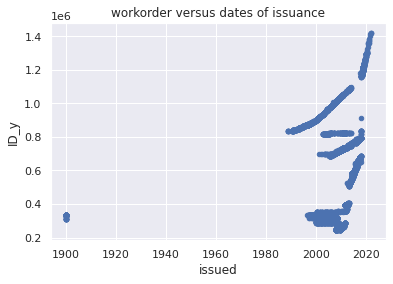

In [116]:
data_aneshos1woeq.plot(y='ID_y',x='issued',kind='scatter',title='workorder versus dates of issuance')

<AxesSubplot:title={'center':'age with workorders'}, xlabel='issued', ylabel='age'>

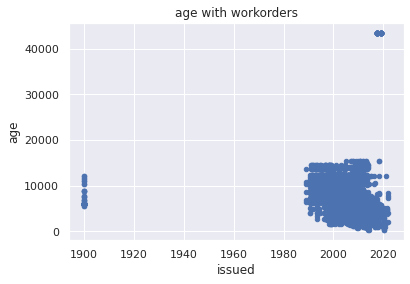

In [117]:
data_aneshos1woeq.plot(y='age',x='issued',kind='scatter',title='age with workorders')

<AxesSubplot:title={'center':'age with workorders'}, xlabel='age', ylabel='Count_wo'>

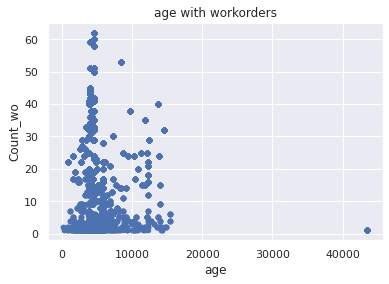

In [118]:
data_aneshos1woeq.plot(x='age',y='Count_wo',kind='scatter',title='age with workorders')

# **Connecting pm and wo with equipments(all data together)**

bringing eq data and setting ID field as an index to prepare for merge

In [119]:
fin.shape

(83584, 8)

In [120]:
eq=fin.set_index('ID',drop=False)

In [121]:
eq.head(3)

,InvNr,Equip.reg_date,Scrapped_date,ID,dev,Brand,Model,calc.Risk
ID,,,,,,,,
68264,C951-02,2001-02-08 00:00:00.000,2018-12-19 00:00:00.000,68264,Endoskop,Wolf,Wolf 5512,31.0
112347,P384,1981-01-01 00:00:00.000,2012-07-19 00:00:00.000,112347,Ljuskälla f endoskop,Wolf,4015,31.0
88325,C0297,1985-01-01 00:00:00.000,2015-12-16 00:00:00.000,88325,Ljuskälla f endoskop,Wolf,4015,31.0


### **CONNECTING PM-data With WO COMBINED DATA** **bold text**

In [122]:
inner_mergeWO_pm = pd.merge(inner_merged_total_WO,fin1,left_index=True, right_index=True)

In [123]:
all_data_together= pd.merge(eq,inner_mergeWO_pm,left_index=True, right_index=True)

In [124]:
all_data_together.head(10)

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,...,inventarieID,last_wo,first_wo,Count_wo,meantime,invID,last_pm,first_pm,count_pm,meantime_pm
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1233471,2019-05-03 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,662950,2017-05-26 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,612067,2016-01-04 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393467,2012-07-23 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1237176,2019-05-21 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1222558,2019-02-28 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,1167578,2018-04-24 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,510206,2013-02-14 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,397564,2012-10-09 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0
1364,9004411,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,394949,2012-08-24 00:00:00.000,...,1364.0,2020-08-13,2011-03-25,65,52,1364,2019-10-24,2019-10-24,1,0


sorting based on inventariedID and issued **date**

In [125]:
all_data_together=all_data_together.sort_values(by=['inventarieID','issued'])

In [126]:
all_data_together=all_data_together.drop(columns=['InvNr','Completed','InventarieID','invID'])

In [127]:
all_data_together.shape

(205291, 19)

In [128]:
all_data_together.head(10)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,AOEkKlarDat,inventarieID,last_wo,first_wo,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,359761,2011-10-25 00:00:00.000,2011-10-26 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,362353,2012-01-02 00:00:00.000,2012-01-02 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,363896,2012-02-07 00:00:00.000,2012-02-23 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,391369,2012-06-18 00:00:00.000,2012-06-18 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393299,2012-07-18 00:00:00.000,2012-12-21 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,393467,2012-07-23 00:00:00.000,2012-12-21 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,394949,2012-08-24 00:00:00.000,2013-01-28 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0


# **Multiple Regression model for Work Orders and Failing time -Anathesia device**

In [129]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [130]:
data_aneshos1woeq.shape

(6915, 9)

model pre-processing

table find difference between fault date and register date 

In [131]:
data_aneshos1woeq['wotime_diff']=(data_aneshos1woeq['issued']-data_aneshos1woeq['Equip.reg_date']).dt.days

In [132]:
data_aneshos1woeq.tail(15)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
231344,1996-09-02,Lungventilator anestesi,30.0,931647,2002-08-27,231344.0,10,686,6862,2185
231344,1996-09-02,Lungventilator anestesi,30.0,915429,2001-04-04,231344.0,10,686,6862,1675
231344,1996-09-02,Lungventilator anestesi,30.0,893058,1999-05-04,231344.0,10,686,6862,974
231344,1996-09-02,Lungventilator anestesi,30.0,1019518,2008-09-19,231344.0,10,686,6862,4400
231345,1997-05-28,Lungventilator anestesi,31.0,877971,1997-05-28,231345.0,2,150,6690,0
231345,1997-05-28,Lungventilator anestesi,31.0,884240,1998-03-25,231345.0,2,150,6690,301
231346,1977-01-01,Lungventilator anestesi,31.0,1081462,2013-01-22,231346.0,4,982,15389,13170
231346,1977-01-01,Lungventilator anestesi,31.0,1169693,2018-05-07,231346.0,4,982,15389,15101
231346,1977-01-01,Lungventilator anestesi,31.0,1047282,2010-09-01,231346.0,4,982,15389,12296
231346,1977-01-01,Lungventilator anestesi,31.0,1064704,2011-11-11,231346.0,4,982,15389,12732


it is not practical for the model to predict certain date and day , it more commonly practices that there is a time window for the decision to be taken .

In [133]:
data_aneshos1woeq.to_csv('device_fail.csv',sep=';')


 **Exploratory data analysis**

Anathesia devices

In [134]:
data_aneshos1woeq.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
68212,2000-01-01,Anestesiarbetsstation,31.0,340382,2002-04-16,68212.0,12,298,6453,836
68212,2000-01-01,Anestesiarbetsstation,31.0,340387,2004-01-12,68212.0,12,298,6453,1472
68212,2000-01-01,Anestesiarbetsstation,31.0,357998,2010-08-17,68212.0,12,298,6453,3881


<AxesSubplot:xlabel='Count_wo', ylabel='wotime_diff'>

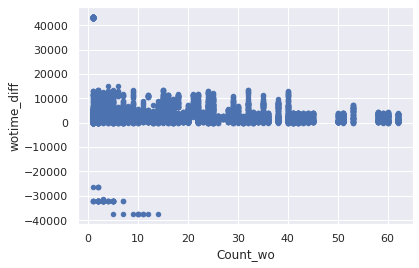

In [135]:
#plotting age
data_aneshos1woeq.plot(x='Count_wo',y='wotime_diff',kind='scatter')

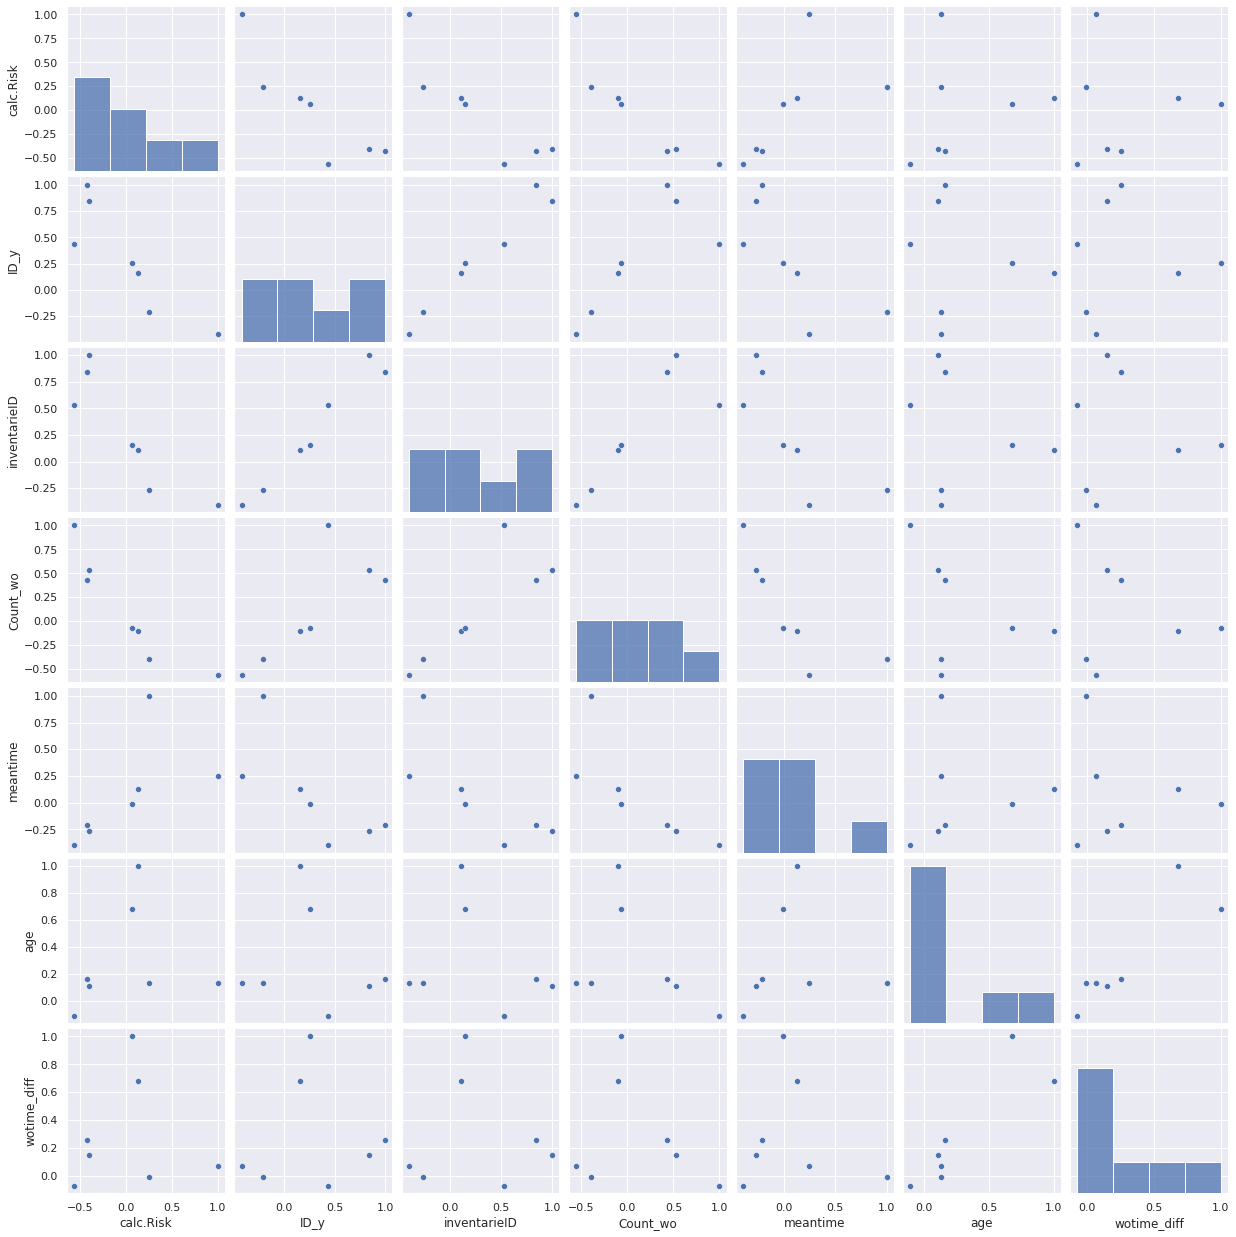

In [136]:
sns.pairplot(data_aneshos1woeq.corr())

In [137]:
Y_reghos1=data_aneshos1woeq['wotime_diff']
X_reghos1=data_aneshos1woeq.drop(['dev','ID_y','issued','Equip.reg_date','wotime_diff','inventarieID'],axis=1)


In [138]:
Y_reghos1.head(3)

68212     836
68212    1472
68212    3881
Name: wotime_diff, dtype: int64

In [139]:
X_train_aneshos1, X_test_aneshos1, y_train_aneshos1, y_test_aneshos1 = train_test_split(
    X_reghos1, Y_reghos1, test_size=0.3, random_state=101)

In [140]:
y_test_aneshos1.head(3)

224950    6128
81838      771
93489     4062
Name: wotime_diff, dtype: int64

In [141]:
# creating a regression model
model_anes = LinearRegression()


In [142]:
model_anes.fit(X_train_aneshos1,y_train_aneshos1)

LinearRegression()

In [143]:
predictions_anes= model_anes.predict(X_test_aneshos1)


In [144]:
 predictions_anes

array([4703.24686136, 1472.45080206, 1304.04745048, ..., 3560.04275472,
       8146.62160612,   31.39283313])

In [145]:
predictions_anes.shape

(2075,)

In [146]:
predictions_anes_df=pd.DataFrame(predictions_anes)

In [147]:
age_col=pd.DataFrame(X_reghos1['age'])
age_col=age_col.reset_index()

In [148]:
age_col.head(3)

,index,age
0,68212,6453
1,68212,6453
2,68212,6453


In [149]:
pred_fin=pd.concat([predictions_anes_df,age_col],axis=1)

In [150]:
pred_fin.drop(columns=['index'],axis=1)

,0,age
0,4703.246861,6453
1,1472.450802,6453
2,1304.047450,6453
3,1005.412485,6453
4,1250.977232,6453
...,...,...
6910,NaN,15389
6911,NaN,15389
6912,NaN,15389
6913,NaN,14538


In [151]:
pred_fin.columns = ['index','wo_timeprednonorm','age']


In [152]:
pred_fin.head(3)

,index,wo_timeprednonorm,age
0,4703.246861,68212,6453
1,1472.450802,68212,6453
2,1304.047450,68212,6453


In [153]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_aneshos1, predictions_anes_df,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1, predictions_anes_df))


Root mean_squared_error :  3546.482390884295
mean_absolute_error :  1657.9922815489542


In [154]:
predictions_anes_df.head(3)

,0
0,4703.246861
1,1472.450802
2,1304.047450


In [155]:
#calculating variance for errors
variability=predictions_anes_df.var()[0]

In [156]:
variability

12287006.909357963

In [157]:
variability2=predictions_anes_df.var()

In [158]:
variability2

0    1.228701e+07
dtype: float64

# **EDA2**

In [159]:
#it is a lot better to take one or two devices as samples to see the workrder patterns

indexed_MD=data_aneshos1woeq.loc[(data_aneshos1woeq.age>=5338.0)]

In [160]:
indexed_MD.tail(50)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
231338,1996-09-02,Lungventilator anestesi,31.0,1067634,2012-01-20,231338.0,5,1516,8703,5618
231338,1996-09-02,Lungventilator anestesi,31.0,889002,1998-04-17,231338.0,5,1516,8703,592
231338,1996-09-02,Lungventilator anestesi,31.0,945829,2003-08-26,231338.0,5,1516,8703,2549
231338,1996-09-02,Lungventilator anestesi,31.0,1019382,2008-09-18,231338.0,5,1516,8703,4399
231338,1996-09-02,Lungventilator anestesi,31.0,1094736,2013-12-05,231338.0,5,1516,8703,6303
231338,1996-09-02,Lungventilator anestesi,31.0,873285,1996-09-02,231338.0,5,1516,8703,0
231339,1996-09-02,Lungventilator anestesi,31.0,1020313,2008-10-14,231339.0,5,922,8205,4425
231339,1996-09-02,Lungventilator anestesi,31.0,1169696,2018-05-07,231339.0,5,922,8205,7917
231339,1996-09-02,Lungventilator anestesi,31.0,1021632,2008-12-01,231339.0,5,922,8205,4473
231339,1996-09-02,Lungventilator anestesi,31.0,1024022,2009-04-20,231339.0,5,922,8205,4613


In [161]:
alone_device=indexed_MD.query("inventarieID==231344.0")

In [162]:
alone_device

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
231344,1996-09-02,Lungventilator anestesi,30.0,873278,1996-09-02,231344.0,10,686,6862,0
231344,1996-09-02,Lungventilator anestesi,30.0,1064455,2011-11-07,231344.0,10,686,6862,5544
231344,1996-09-02,Lungventilator anestesi,30.0,904679,2000-07-28,231344.0,10,686,6862,1425
231344,1996-09-02,Lungventilator anestesi,30.0,991762,2006-10-30,231344.0,10,686,6862,3710
231344,1996-09-02,Lungventilator anestesi,30.0,1040230,2010-02-23,231344.0,10,686,6862,4922
231344,1996-09-02,Lungventilator anestesi,30.0,1059409,2011-06-23,231344.0,10,686,6862,5407
231344,1996-09-02,Lungventilator anestesi,30.0,931647,2002-08-27,231344.0,10,686,6862,2185
231344,1996-09-02,Lungventilator anestesi,30.0,915429,2001-04-04,231344.0,10,686,6862,1675
231344,1996-09-02,Lungventilator anestesi,30.0,893058,1999-05-04,231344.0,10,686,6862,974
231344,1996-09-02,Lungventilator anestesi,30.0,1019518,2008-09-19,231344.0,10,686,6862,4400


In [163]:
alone=alone_device.to_csv('alone.csv',sep=';')


In [165]:
with open('model_pickle_patientmonitor','wb') as f:
  pickle.dump(model_pa,f)

NameError: ignored

In [166]:
indexed_MD.set_index('issued',inplace=True,drop=False)

In [167]:
indexed_MD.inventarieID.value_counts()

243763.0    56
82378.0     42
243754.0    42
84606.0     41
243757.0    38
            ..
200378.0     1
243764.0     1
225226.0     1
225119.0     1
225230.0     1
Name: inventarieID, Length: 278, dtype: int64

**Trying normalization and see if it works**

In [168]:
from sklearn.preprocessing import MinMaxScaler

In [169]:
scaler=MinMaxScaler()
scaler.fit(X_reghos1)
scaled=scaler.fit_transform(X_reghos1)
scaled_df=pd.DataFrame(scaled,columns=X_reghos1.columns)

In [170]:
scaled_df.shape

(6915, 4)

In [171]:
scaled_df.head(3)


,calc.Risk,Count_wo,meantime,age
0,1.0,0.180328,0.117554,0.144754
1,1.0,0.180328,0.117554,0.144754
2,1.0,0.180328,0.117554,0.144754


In [172]:
X_train_aneshos1norm, X_test_aneshos1norm, y_train_aneshos1norm, y_test_aneshos1norm = train_test_split(
    scaled_df, Y_reghos1,test_size=0.3, random_state=101)

In [173]:
Y_reghos1.head(3)

68212     836
68212    1472
68212    3881
Name: wotime_diff, dtype: int64

In [174]:
model_anesnorm = LinearRegression()


In [175]:
model_anesnorm.fit(X_train_aneshos1norm,y_train_aneshos1norm)

LinearRegression()

In [176]:
predictions_anesnorm= model_anesnorm.predict(X_test_aneshos1norm)


In [177]:
predictions_anesnorm

array([4703.24686136, 1472.45080206, 1304.04745048, ..., 3560.04275472,
       8146.62160612,   31.39283313])

In [178]:
predictions_anes_dfnorm=pd.DataFrame(predictions_anesnorm)

In [179]:
predictions_anes_dfnorm.head(3)

,0
0,4703.246861
1,1472.450802
2,1304.047450


In [180]:
predictions_anes_dfnorm.columns = ['wo_timepred']


In [181]:
predictions_anes_dfnorm.head(3)

,wo_timepred
0,4703.246861
1,1472.450802
2,1304.047450


In [182]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_aneshos1, predictions_anes_dfnorm))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_aneshos1, predictions_anes_dfnorm))


mean_squared_error :  12577537.348852385
mean_absolute_error :  1657.9922815489551


# **OXYGEN CONCENTRATOR Model after adding more adding pm attributes**

In [183]:
pm_wo_attributes_oxygen=pd.merge(dataoxyhos1,fin1,left_index=True,right_index=True)

In [184]:
pm_wo_attributes_oxygen.head(3)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,invID,last_pm,first_pm,count_pm,meantime_pm
114057,2003-01-01,Oxygenkoncentrator stationär,31.0,429195,2009-11-05 00:00:00.000,114057.0,4,133,3190,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,Oxygenkoncentrator stationär,31.0,404452,2008-05-22 00:00:00.000,114057.0,4,133,3190,114057,2009-11-05,2009-11-05,1,0
114057,2003-01-01,Oxygenkoncentrator stationär,31.0,411895,2008-08-18 00:00:00.000,114057.0,4,133,3190,114057,2009-11-05,2009-11-05,1,0


In [185]:
pm_wo_attributes_oxygen.shape

(4882, 14)

In [186]:
pm_wo_attributes_oxygen['Equip.reg_date']=pd.to_datetime(pm_wo_attributes_oxygen['Equip.reg_date'])
pm_wo_attributes_oxygen['issued']=pd.to_datetime(pm_wo_attributes_oxygen['issued'])


In [187]:
pm_wo_attributes_oxygen['wotime_diff']=(pm_wo_attributes_oxygen['issued']-pm_wo_attributes_oxygen['Equip.reg_date']).dt.days

In [188]:
pm_wo_attributes_oxygen.drop(columns=['Equip.reg_date','issued','invID','last_pm','first_pm','calc.Risk'],inplace=True)

# **Regression model for oxygen concentrators**

In [189]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [190]:
dataoxyhos1.shape

(6247, 9)

In [191]:
dataoxyhos1.nunique()

Equip.reg_date     106
dev                  1
calc.Risk            2
ID_y              6247
issued            2455
inventarieID       905
Count_wo            18
meantime           371
age                395
dtype: int64

In [192]:
dataoxyhos1['Equip.reg_date']=pd.to_datetime(dataoxyhos1['Equip.reg_date'])
dataoxyhos1['issued']=pd.to_datetime(dataoxyhos1['issued'])



In [193]:
dataoxyhos1.drop(columns=['dev','inventarieID','ID_y'],inplace=True)

In [194]:
dataoxyhos1['wotime_diff']=(dataoxyhos1['issued']-dataoxyhos1['Equip.reg_date']).dt.days

In [195]:
dataoxyhos1.corr()

,calc.Risk,Count_wo,meantime,age,wotime_diff
calc.Risk,1.000000,0.045117,-0.073529,-0.049107,0.004064
Count_wo,0.045117,1.000000,-0.117363,0.439771,0.359941
meantime,-0.073529,-0.117363,1.000000,-0.094614,-0.050114
age,-0.049107,0.439771,-0.094614,1.000000,0.890333
wotime_diff,0.004064,0.359941,-0.050114,0.890333,1.000000


In [196]:
dataoxyhos1.describe()

,calc.Risk,Count_wo,meantime,age,wotime_diff
count,6247.000000,6247.000000,6247.000000,6247.000000,6247.000000
mean,30.993277,7.137506,228.247479,3201.429326,1537.281415
std,0.216852,3.531000,144.545070,2243.907974,1980.764976
min,24.000000,1.000000,0.000000,213.000000,-334.000000
25%,31.000000,5.000000,123.000000,2238.000000,433.000000
50%,31.000000,7.000000,225.000000,2765.000000,1003.000000
75%,31.000000,9.000000,308.000000,3350.000000,1864.000000
max,31.000000,19.000000,1426.000000,12113.000000,10089.000000


In [197]:
Y_oxygen=dataoxyhos1['wotime_diff']
X_oxygen=dataoxyhos1.drop(['issued','Equip.reg_date','wotime_diff'],axis=1)


In [198]:
X_train_oxy1, X_test_oxy1, y_train_oxy1, y_test_oxy1 = train_test_split(X_oxygen,Y_oxygen, test_size=0.3, random_state=101)

In [199]:
y_train_oxy1.head(3)

120111    2476
232871    8619
124841    2838
Name: wotime_diff, dtype: int64

In [200]:
model_oxy = LinearRegression()
model_oxy.fit(X_train_oxy1,y_train_oxy1)

LinearRegression()

In [201]:
predictions_oxy=model_oxy.predict(X_test_oxy1)

In [202]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_oxy1, predictions_oxy,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_oxy1, predictions_oxy))


Root mean_squared_error :  899.8454011031992
mean_absolute_error :  756.3610054742791


In [203]:
predictions_oxy

array([1061.72876053,  746.40549413, 1263.58411974, ..., 1289.10996807,
       1604.94127798, 1533.41302781])

In [204]:
variability4=predictions_oxy.var()

In [205]:
variability4

3155873.1780498647

# **Patient_monitor experiments**

In [206]:
patient_monitor=all_data_together.query("dev == 'Patientmonitor multiparameter'")


In [207]:
patient_monitor.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,AOEkKlarDat,inventarieID,last_wo,first_wo,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,65589,Patientmonitor multiparameter,Simonsen & Weel,DS 521,31.0,325333,1900-01-01 00:00:00.000,1900-01-01 00:00:00.000,65589.0,2003-04-16,1997-10-20,2,1002,2011-04-03,2011-04-03,1,0
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,65589,Patientmonitor multiparameter,Simonsen & Weel,DS 521,31.0,325334,1900-01-01 00:00:00.000,1900-01-01 00:00:00.000,65589.0,2003-04-16,1997-10-20,2,1002,2011-04-03,2011-04-03,1,0
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,65589,Patientmonitor multiparameter,Simonsen & Weel,DS 521,31.0,325328,1997-10-20 00:00:00.000,1997-10-20 00:00:00.000,65589.0,2003-04-16,1997-10-20,2,1002,2011-04-03,2011-04-03,1,0


In [208]:
patient_monitor.shape

(11879, 19)

In [209]:
refined_patient_monitor=patient_monitor.drop(columns=['Brand','ID_x','dev','Brand','calc.Risk', 'ID_y','last_wo','first_wo'])

In [210]:
refined_patient_monitor.head(3)

,Equip.reg_date,Scrapped_date,Model,issued,AOEkKlarDat,inventarieID,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,DS 521,1900-01-01 00:00:00.000,1900-01-01 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,DS 521,1900-01-01 00:00:00.000,1900-01-01 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0
65589,1979-01-01 00:00:00.000,2003-04-16 00:00:00.000,DS 521,1997-10-20 00:00:00.000,1997-10-20 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0


In [211]:
refined_patient_monitor['Equip.reg_date']=pd.to_datetime(refined_patient_monitor['Equip.reg_date'])
refined_patient_monitor['issued']=pd.to_datetime(refined_patient_monitor['issued'])
refined_patient_monitor['Scrapped_date']=pd.to_datetime(refined_patient_monitor['Scrapped_date'])




In [212]:
refined_patient_monitor['wotime_diff']=(refined_patient_monitor['issued']-refined_patient_monitor['Equip.reg_date']).dt.days
refined_patient_monitor['age']=(refined_patient_monitor['Scrapped_date']-refined_patient_monitor['Equip.reg_date']).dt.days

In [213]:
refined_patient_monitor.head(3)

,Equip.reg_date,Scrapped_date,Model,issued,AOEkKlarDat,inventarieID,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm,wotime_diff,age
65589,1979-01-01,2003-04-16,DS 521,1900-01-01,1900-01-01 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0,-28854,8871
65589,1979-01-01,2003-04-16,DS 521,1900-01-01,1900-01-01 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0,-28854,8871
65589,1979-01-01,2003-04-16,DS 521,1997-10-20,1997-10-20 00:00:00.000,65589.0,2,1002,2011-04-03,2011-04-03,1,0,6867,8871


In [214]:
refined_patient_monitor.shape

(11879, 14)

<AxesSubplot:xlabel='Equip.reg_date', ylabel='Scrapped_date'>

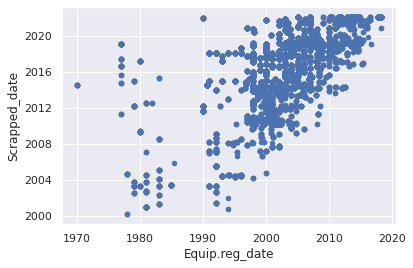

In [215]:
#taking out outliers 
refined_patient_monitor.plot(x='Equip.reg_date',y='Scrapped_date',kind='scatter')


In [216]:
no_outlier_pamonitor=refined_patient_monitor.loc[refined_patient_monitor['wotime_diff']>=1]

In [217]:
no_outlier_pamonitor.corr()

,inventarieID,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
inventarieID,1.000000,0.066446,-0.290282,0.176917,0.157935,-0.171324,-0.336182
Count_wo,0.066446,1.000000,-0.241943,0.116070,0.068411,0.040144,0.198888
meantime,-0.290282,-0.241943,1.000000,0.021314,0.137269,0.062084,0.127064
count_pm,0.176917,0.116070,0.021314,1.000000,-0.062837,-0.041335,0.029560
meantime_pm,0.157935,0.068411,0.137269,-0.062837,1.000000,-0.104221,-0.118980
wotime_diff,-0.171324,0.040144,0.062084,-0.041335,-0.104221,1.000000,0.588603
age,-0.336182,0.198888,0.127064,0.029560,-0.118980,0.588603,1.000000


In [218]:
no_outlier_pamonitor.shape

(11547, 14)

In [219]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [220]:
X_PA=no_outlier_pamonitor.drop(['Equip.reg_date','Scrapped_date','issued','AOEkKlarDat','Model','last_pm','first_pm','inventarieID'],axis=1)
Y_PA=no_outlier_pamonitor['wotime_diff']

In [221]:
Y_PA.head(10)

65589    6867
65589    7352
65589    7970
65589    8689
65589    8871
65590    5593
65590    6076
65590    6669
65591    7769
65595    4885
Name: wotime_diff, dtype: int64

In [222]:
X_train_pamonitor, X_test_pamonitor, y_train_pamonitor, y_test_pamonitor = train_test_split(X_PA,Y_PA, test_size=0.3, random_state=101)

In [223]:
X_train_pamonitor.head()

,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
240390,9,618,9,390,2754,5562
203221,6,538,6,443,3871,3871
236007,9,310,1,0,139,3683
203080,10,330,4,572,756,3946
202810,2,361,2,147,4258,5453


In [224]:
# creating a regression model
model_PA = LinearRegression()


In [225]:
model_PA.fit(X_train_pamonitor,y_train_pamonitor)

LinearRegression()

In [226]:
predictions_PA= model_PA.predict(X_test_pamonitor)


In [227]:
predictions_PA=pd.DataFrame(predictions_PA)

In [228]:
predictions_PA.head(10)

,0
0,1842.0
1,1337.0
2,2264.0
3,2103.0
4,1845.0
5,1686.0
6,1729.0
7,1493.0
8,1686.0
9,5754.0


In [229]:
y_test_pamonitor.head(10)

85633     1842
236028    1337
84618     2264
90279     2103
202830    1845
203163    1686
98210     1729
83761     1493
203159    1686
67647     5754
Name: wotime_diff, dtype: int64

In [230]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_pamonitor, predictions_PA,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_pamonitor, predictions_PA))


Root mean_squared_error :  8.244711272421927e-13
mean_absolute_error :  5.53670176885746e-13


In [231]:
variability5=predictions_PA.var()

In [232]:
variability5

0    2.998662e+06
dtype: float64

# **Chosen devices in one regression model experiment**

In [233]:
#after combining wo data with preventive mainteance data in one dataframe,we want to query the chosen device of anathesia and oxygen concentrators:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,AOEkKlarDat,inventarieID,last_wo,first_wo,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0


In [234]:
refined_all_data=all_data_together.drop(['ID_x','AOEkKlarDat','inventarieID','last_wo','first_wo','last_pm','first_pm'],axis=1)

In [235]:
refined_all_data.head(3)

,Equip.reg_date,Scrapped_date,dev,Brand,Model,calc.Risk,ID_y,issued,Count_wo,meantime,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,65,52,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,65,52,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,65,52,1,0


In [236]:
data157=refined_all_data.query("dev == 'Anestesiarbetsstation'")
data156=refined_all_data.query("dev == 'Anestesiarbetsstation'")
data155=refined_all_data.query("dev == 'Modul till anestesiarbetsstation'")
data154=refined_all_data.query("dev == 'Anestesimedelsförgasare, isofluran'")
data153=refined_all_data.query("dev == 'Anestesimedel Förgasare'")
data152=refined_all_data.query("dev == 'Anestesiapparat mobil'")
data151=refined_all_data.query("dev == 'Lungventilator anestesi'")
data_anesWo_pm = pd.concat([data157, data156,data155,data154, data153, data152, data151], axis=0)

In [237]:
data_anesWo_pm.shape

(9843, 12)

In [238]:
#query oxygen concentrators
data_oxy_wo_pm=refined_all_data.query("dev == 'Oxygenkoncentrator stationär'")

In [239]:
data_oxy_wo_pm.shape

(4882, 12)

In [240]:
oxyplusana_wo_pm=pd.concat([data_oxy_wo_pm,data_anesWo_pm], axis=0)

In [241]:
oxyplusana_wo_pm.shape

(14725, 12)

In [242]:
oxyplusana_wo_pm.head(3)

,Equip.reg_date,Scrapped_date,dev,Brand,Model,calc.Risk,ID_y,issued,Count_wo,meantime,count_pm,meantime_pm
114057,2003-01-01 00:00:00.000,2011-09-26 00:00:00.000,Oxygenkoncentrator stationär,DeVilbiss,515,31.0,404452,2008-05-22 00:00:00.000,4,133,1,0
114057,2003-01-01 00:00:00.000,2011-09-26 00:00:00.000,Oxygenkoncentrator stationär,DeVilbiss,515,31.0,411895,2008-08-18 00:00:00.000,4,133,1,0
114057,2003-01-01 00:00:00.000,2011-09-26 00:00:00.000,Oxygenkoncentrator stationär,DeVilbiss,515,31.0,425627,2009-07-28 00:00:00.000,4,133,1,0


In [243]:
#preprocessing of these data before merge with patient monitor data.
oxyplusana_wo_pm['Equip.reg_date']=pd.to_datetime(oxyplusana_wo_pm['Equip.reg_date'])
oxyplusana_wo_pm['Scrapped_date']=pd.to_datetime(oxyplusana_wo_pm['Scrapped_date'])
oxyplusana_wo_pm['issued']=pd.to_datetime(oxyplusana_wo_pm['issued'])

In [244]:
oxyplusana_wo_pm['wotime_diff']=(oxyplusana_wo_pm['issued']-oxyplusana_wo_pm['Equip.reg_date']).dt.days

In [245]:
oxyplusana_wo_pm['age']=(oxyplusana_wo_pm['Scrapped_date']-oxyplusana_wo_pm['Equip.reg_date']).dt.days


In [246]:
oxyplusana_wo_pm.drop(['Equip.reg_date','Scrapped_date','dev','Brand','Model','calc.Risk','ID_y','issued'],axis=1,inplace=True)

In [247]:
oxyplusana_wo_pm.head(3)

,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
114057,4,133,1,0,1968,3190
114057,4,133,1,0,2056,3190
114057,4,133,1,0,2400,3190


In [248]:
X_PA.head(3)

,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
65589,2,1002,1,0,6867,8871
65589,2,1002,1,0,7352,8871
65589,2,1002,1,0,7970,8871


In [249]:
#concat all devices(anathesia,oxygenconcentrator and patient monitor)
alldevices_regression=pd.concat((oxyplusana_wo_pm,X_PA),axis=0)

In [250]:
x_alla=alldevices_regression.drop(['wotime_diff'],axis=1)
y_alla=alldevices_regression.drop(['Count_wo','meantime','count_pm','meantime_pm','age'],axis=1)
  

In [251]:
y_alla.head(3)

,wotime_diff
114057,1968
114057,2056
114057,2400


In [252]:
x_alla_training,x_alla_test,y_alla_training,y_alla_test=train_test_split(x_alla,y_alla,test_size=0.3,random_state=101)

In [253]:
x_alla_training.shape

(18390, 5)

In [254]:
y_alla_training.shape

(18390, 1)

In [255]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [256]:
#now we apply the model 
regress_alldevices=LinearRegression()

In [257]:
modelen=regress_alldevices.fit(x_alla_training,y_alla_training)

In [258]:
predictions_alla=modelen.predict(x_alla_test)

In [259]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_alla_test, predictions_alla,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_alla_test, predictions_alla))


Root mean_squared_error :  2496.991232278502
mean_absolute_error :  1222.6662504732371


# **#  Ridge regression for regression_patient monitor**

In [260]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [261]:
X_PA=no_outlier_pamonitor.drop(['Equip.reg_date','Scrapped_date','issued','AOEkKlarDat','Model','last_pm','first_pm','inventarieID'],axis=1)
Y_PA=no_outlier_pamonitor['wotime_diff']

In [262]:
X_train_pamonitor_ridge, X_test_pamonitor_ridge, y_train_pamonitor_ridge, y_test_pamonitor_ridge = train_test_split(X_PA,Y_PA, test_size=0.3, random_state=101)

In [263]:
X_train_pamonitor_ridge.head(3)

,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
240390,9,618,9,390,2754,5562
203221,6,538,6,443,3871,3871
236007,9,310,1,0,139,3683


In [264]:
ocurrenc=X_train_pamonitor_ridge.Count_wo.value_counts()

In [265]:
occurence1=pd.DataFrame(ocurrenc)

In [266]:
occurence1.head(4)

,Count_wo
5,935
4,914
3,909
6,875


In [267]:
occurence1.shape

(28, 1)

In [268]:
#define model
model_ridge = RidgeCV(alphas=arange(0.01, 0.5, 0.01), scoring='neg_mean_absolute_error')

In [269]:
#fit model
model_ridge.fit(X_train_pamonitor_ridge,y_train_pamonitor_ridge)

#display lambda that produced the lowest test MSE
print(model_ridge.alpha_)

0.01


In [270]:
predictions_paridge=model_ridge.predict(X_test_pamonitor_ridge)

In [271]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_pamonitor,predictions_paridge,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_pamonitor_ridge,predictions_paridge))


Root mean_squared_error :  1.9932826420831649
mean_absolute_error :  1.429300792122431


In [272]:
predictions_paridge

array([1842.18731928, 1337.61516673, 2262.48716159, ..., 3870.24683531,
       2138.77136586, 2864.64265168])

In [273]:
y_test_pamonitor

85633     1842
236028    1337
84618     2264
90279     2103
202830    1845
          ... 
108312    3957
101160    2689
203108    3870
98212     2140
202743    2865
Name: wotime_diff, Length: 3465, dtype: int64

In [274]:
from sklearn.linear_model import Lasso

In [275]:
lasso = Lasso(alpha=1.0)

In [276]:
lasso.fit(X_train_pamonitor_ridge,y_train_pamonitor_ridge)


Lasso()

In [277]:
lasso.score(X_test_pamonitor_ridge,y_test_pamonitor_ridge), lasso.score(X_train_pamonitor_ridge,y_train_pamonitor_ridge)

(0.999999998924765, 0.9999999989549186)

In [278]:
predictions_lasso=lasso.predict(X_test_pamonitor_ridge)

In [279]:
# model evaluation
print(
'mean_squared_error : ', mean_squared_error(y_test_pamonitor,predictions_lasso))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_pamonitor_ridge,predictions_lasso))


mean_squared_error :  0.003223335915473304
mean_absolute_error :  0.04602733164816005


# **Ridge regression for oxygen concentrators without pm data (only wo data )**

In [280]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [281]:
Y_oxygen=dataoxyhos1['wotime_diff']
X_oxygen=dataoxyhos1.drop(['issued','Equip.reg_date','wotime_diff'],axis=1)


In [282]:
X_train_oxy_ridge, X_test_oxy_ridge, y_train_oxy_ridge, y_test_oxy_ridge = train_test_split(X_oxygen,Y_oxygen, test_size=0.3, random_state=101)

In [283]:
X_train_oxy_ridge.head(3)

,calc.Risk,Count_wo,meantime,age
120111,31.0,14,197,2950
232871,31.0,8,149,12113
124841,31.0,8,341,2838


In [284]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [285]:
#define model
model_ridge_oxy = RidgeCV(alphas=arange(0.01, 0.5, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [286]:
#fit model
model_ridge_oxy.fit(X_train_oxy_ridge,y_train_oxy_ridge)

#display lambda that produced the lowest test MSE
print(model_ridge_oxy.alpha_)

0.49


In [287]:
predictions_oxyridge=model_ridge_oxy.predict(X_test_oxy_ridge)

In [288]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_oxy_ridge,predictions_oxyridge,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_oxy_ridge,predictions_oxyridge))


Root mean_squared_error :  899.8464299971694
mean_absolute_error :  756.3613434903847


# **Ridge regression for oxygen concentrators with PM data 

In [289]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [290]:
pm_wo_attributes_oxygen.head(3)

,dev,ID_y,inventarieID,Count_wo,meantime,age,count_pm,meantime_pm,wotime_diff
114057,Oxygenkoncentrator stationär,429195,114057.0,4,133,3190,1,0,2500
114057,Oxygenkoncentrator stationär,404452,114057.0,4,133,3190,1,0,1968
114057,Oxygenkoncentrator stationär,411895,114057.0,4,133,3190,1,0,2056


In [291]:
Y_oxygen_pm=pm_wo_attributes_oxygen['wotime_diff']


In [292]:
X_oxygen_pm=pm_wo_attributes_oxygen.drop(columns=['wotime_diff','dev','ID_y','inventarieID'])

In [293]:
X_oxygen_pm.head(3)

,Count_wo,meantime,age,count_pm,meantime_pm
114057,4,133,3190,1,0
114057,4,133,3190,1,0
114057,4,133,3190,1,0


In [294]:
X_train_oxy_ridge_pm, X_test_oxy_ridge_pm, y_train_oxy_ridge_pm, y_test_oxy_ridge_pm = train_test_split(X_oxygen_pm,Y_oxygen_pm, test_size=0.3, random_state=101)

In [295]:
X_train_oxy_ridge_pm.head(3)

,Count_wo,meantime,age,count_pm,meantime_pm
115965,6,382,3680,3,237
126798,9,133,2968,4,145
124838,6,360,2757,3,272


In [296]:
#define cross-validation method to evaluate model
cv4 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [297]:
#define model
model_ridge_oxy_pm = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [298]:
#fit model
model_ridge_oxy_pm.fit(X_train_oxy_ridge_pm,y_train_oxy_ridge_pm)

#display lambda that produced the lowest test MSE
print(model_ridge_oxy_pm.alpha_)

0.99

0.01


0.99

In [299]:
predictions_oxyridge_pm=model_ridge_oxy_pm.predict(X_test_oxy_ridge_pm)

In [300]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_oxy_ridge_pm,predictions_oxyridge_pm,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_oxy_ridge_pm,predictions_oxyridge_pm))


Root mean_squared_error :  781.6439683040084
mean_absolute_error :  646.4235166914456


# **Ridge regression for anathesia without pm**

In [301]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [302]:
Y_reghos2_ridge=data_aneshos1woeq['wotime_diff']
X_reghos2_ridge=data_aneshos1woeq.drop(['dev','ID_y','issued','Equip.reg_date','wotime_diff','inventarieID'],axis=1)


In [303]:
X_reghos2_ridge.head(3)

,calc.Risk,Count_wo,meantime,age
68212,31.0,12,298,6453
68212,31.0,12,298,6453
68212,31.0,12,298,6453


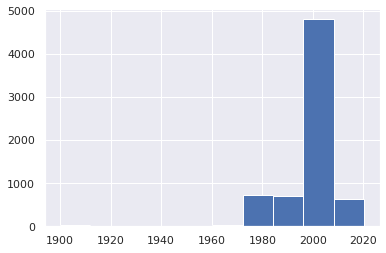

In [304]:
import matplotlib.pyplot as plt

x = data_aneshos1woeq['Equip.reg_date']
plt.hist(x)
plt.show()

In [305]:
X_train_anathesia_ridge, X_test_anathesia_ridge, y_train_anathesia_ridge, y_test_anathesia_ridge = train_test_split(X_reghos2_ridge,Y_reghos2_ridge, test_size=0.3, random_state=101)

In [306]:
X_train_anathesia_ridge.head(3)

,calc.Risk,Count_wo,meantime,age
225122,31.0,21,252,12247
231341,31.0,6,681,4246
84610,29.0,13,541,7189


In [307]:
#define cross-validation method to evaluate model
cv5 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [308]:
#define model
model_ridge_ana = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

In [309]:
#fit model
model_ridge_ana.fit(X_train_anathesia_ridge,y_train_anathesia_ridge)

#display lambda that produced the lowest test MSE
print(model_ridge_ana.alpha_)

0.99

0.99


0.99

In [310]:
predictions_anaridge=model_ridge_ana.predict(X_test_anathesia_ridge)

In [375]:
# model evaluation
print(
'ROoot mean_squared_error : ', mean_squared_error(y_test_anathesia_ridge,predictions_anaridge,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_anathesia_ridge,predictions_anaridge))


ROoot mean_squared_error :  3546.480740849589
mean_absolute_error :  1657.988038415453


# **Ridge regression for anathesia with pm data included**

In [312]:
data_anesWo_pm.head(3)

,Equip.reg_date,Scrapped_date,dev,Brand,Model,calc.Risk,ID_y,issued,Count_wo,meantime,count_pm,meantime_pm
68212,2000-01-01 00:00:00.000,2017-09-01 00:00:00.000,Anestesiarbetsstation,Dräger,Julian,31.0,340376,2000-10-30 00:00:00.000,12,298,1,0
68212,2000-01-01 00:00:00.000,2017-09-01 00:00:00.000,Anestesiarbetsstation,Dräger,Julian,31.0,340378,2001-02-06 00:00:00.000,12,298,1,0
68212,2000-01-01 00:00:00.000,2017-09-01 00:00:00.000,Anestesiarbetsstation,Dräger,Julian,31.0,340377,2001-02-16 00:00:00.000,12,298,1,0


In [313]:
data_anesWo_pm['Equip.reg_date']=(pd.to_datetime(data_anesWo_pm['Equip.reg_date']))
data_anesWo_pm['Scrapped_date']=(pd.to_datetime(data_anesWo_pm['Scrapped_date']))
data_anesWo_pm['issued']=(pd.to_datetime(data_anesWo_pm['issued']))
data_anesWo_pm['age']=(data_anesWo_pm['Scrapped_date']-data_anesWo_pm['Equip.reg_date']).dt.days
data_anesWo_pm['wotime_diff']=(data_anesWo_pm['issued']-data_anesWo_pm['Equip.reg_date']).dt.days

In [314]:
data_anesWo_pm.shape

(9843, 14)

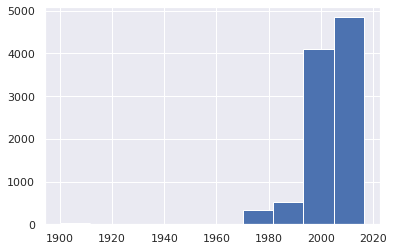

In [315]:
 import matplotlib.pyplot as plt

x = data_anesWo_pm['Equip.reg_date']
plt.hist(x)
plt.show()

In [316]:
#taking out outliers
noutlier_data_anesWo_pm=data_anesWo_pm.loc[data_anesWo_pm['Equip.reg_date']<='1990-01-01']

In [317]:
noutlier_data_anesWo_pm.shape

(771, 14)

In [318]:
#let us take out all the unnecessary columns from our way 
data_anesWo_pm.drop(columns=[])

,Equip.reg_date,Scrapped_date,dev,Brand,Model,calc.Risk,ID_y,issued,Count_wo,meantime,count_pm,meantime_pm,age,wotime_diff
68212,2000-01-01,2017-09-01,Anestesiarbetsstation,Dräger,Julian,31.0,340376,2000-10-30,12,298,1,0,6453,303
68212,2000-01-01,2017-09-01,Anestesiarbetsstation,Dräger,Julian,31.0,340378,2001-02-06,12,298,1,0,6453,402
68212,2000-01-01,2017-09-01,Anestesiarbetsstation,Dräger,Julian,31.0,340377,2001-02-16,12,298,1,0,6453,412
68212,2000-01-01,2017-09-01,Anestesiarbetsstation,Dräger,Julian,31.0,340379,2001-12-06,12,298,1,0,6453,705
68212,2000-01-01,2017-09-01,Anestesiarbetsstation,Dräger,Julian,31.0,340380,2002-02-01,12,298,1,0,6453,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231346,1977-01-01,2019-02-19,Lungventilator anestesi,Anmedic,JB1,31.0,1047282,2010-09-01,4,982,7,400,15389,12296
231346,1977-01-01,2019-02-19,Lungventilator anestesi,Anmedic,JB1,31.0,1047278,2010-09-01,4,982,7,400,15389,12296
231346,1977-01-01,2019-02-19,Lungventilator anestesi,Anmedic,JB1,31.0,1064704,2011-11-11,4,982,7,400,15389,12732
231346,1977-01-01,2019-02-19,Lungventilator anestesi,Anmedic,JB1,31.0,1081462,2013-01-22,4,982,7,400,15389,13170


# **Decsion tree for regression compared to linear regression flavours**

# Anathesia decision tree 

In [319]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [320]:
Y_reghos2_ridge=data_aneshos1woeq['wotime_diff']
X_reghos2_ridge=data_aneshos1woeq.drop(['dev','ID_y','issued','Equip.reg_date','wotime_diff','inventarieID'],axis=1)


In [321]:
X_reghos2_ridge.head(3)

,calc.Risk,Count_wo,meantime,age
68212,31.0,12,298,6453
68212,31.0,12,298,6453
68212,31.0,12,298,6453


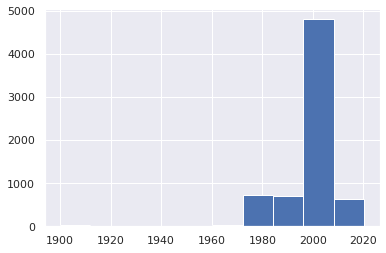

In [322]:
import matplotlib.pyplot as plt

x = data_aneshos1woeq['Equip.reg_date']
plt.hist(x)
plt.show()

In [323]:
X_train_anathesia_ridge, X_test_anathesia_ridge, y_train_anathesia_ridge, y_test_anathesia_ridge = train_test_split(X_reghos2_ridge,Y_reghos2_ridge, test_size=0.3, random_state=101)

In [324]:
X_train_anathesia_ridge.head(3)

,calc.Risk,Count_wo,meantime,age
225122,31.0,21,252,12247
231341,31.0,6,681,4246
84610,29.0,13,541,7189


In [325]:
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [326]:
# Initializing the Decision Tree Regression model
model_DT= DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model_DT.fit(X_train_anathesia_ridge,y_train_anathesia_ridge)

DecisionTreeRegressor(random_state=0)

In [327]:
# Predicting the target values of the test set
y_pred_dt = model_DT.predict(X_test_anathesia_ridge)

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(y_test_anathesia_ridge, y_pred_dt)), '.3f'))
print("\nRMSE: ", rmse)
RMSE: 133.351


RMSE:  3944.827


In [328]:
print(
'mean_absolute_error : ', mean_absolute_error(y_test_anathesia_ridge,y_pred_dt))

mean_absolute_error :  1718.677763420782


In [329]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_anathesia_ridge,y_pred_dt,squared=False))


Root mean_squared_error :  3944.826731979216


# **patient monitor**

In [330]:
X_PA=no_outlier_pamonitor.drop(['Equip.reg_date','Scrapped_date','issued','AOEkKlarDat','Model','last_pm','first_pm','inventarieID'],axis=1)
Y_PA=no_outlier_pamonitor['wotime_diff']

In [331]:
X_train_pamonitor_ridge, X_test_pamonitor_ridge, y_train_pamonitor_ridge, y_test_pamonitor_ridge = train_test_split(X_PA,Y_PA, test_size=0.3, random_state=101)

In [332]:
X_train_pamonitor_ridge.head(3)

,Count_wo,meantime,count_pm,meantime_pm,wotime_diff,age
240390,9,618,9,390,2754,5562
203221,6,538,6,443,3871,3871
236007,9,310,1,0,139,3683


In [333]:
 # Initializing the Decision Tree Regression model
model_pa = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model_pa.fit(X_train_pamonitor_ridge,y_train_pamonitor_ridge)

DecisionTreeRegressor(random_state=0)

In [334]:
predictions_pa_dt=model_pa.predict(X_test_pamonitor_ridge)

In [335]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_pamonitor,predictions_pa_dt,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_pamonitor_ridge,predictions_pa_dt))


Root mean_squared_error :  12.767597425183174
mean_absolute_error :  1.5668109668109669


In [336]:
#pickling files
#writing a pickle into a file
import pickle



In [337]:
 with open('model_pickle_patientmonitor','wb') as f:
  pickle.dump(model_pa,f)

In [338]:
with open('model_pickle_patientmonitor','rb')as f:
    model_class_patient=pickle.load(f)

# **OXYGEN concentrator

In [339]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [340]:
pm_wo_attributes_oxygen.head(3)

,dev,ID_y,inventarieID,Count_wo,meantime,age,count_pm,meantime_pm,wotime_diff
114057,Oxygenkoncentrator stationär,429195,114057.0,4,133,3190,1,0,2500
114057,Oxygenkoncentrator stationär,404452,114057.0,4,133,3190,1,0,1968
114057,Oxygenkoncentrator stationär,411895,114057.0,4,133,3190,1,0,2056


In [341]:
Y_oxygen_pm=pm_wo_attributes_oxygen['wotime_diff']


In [342]:
X_oxygen_pm=pm_wo_attributes_oxygen.drop(columns=['wotime_diff','dev','ID_y','inventarieID'])

In [343]:
X_oxygen_pm.head(3)

,Count_wo,meantime,age,count_pm,meantime_pm
114057,4,133,3190,1,0
114057,4,133,3190,1,0
114057,4,133,3190,1,0


In [344]:
X_train_oxy_ridge_pm, X_test_oxy_ridge_pm, y_train_oxy_ridge_pm, y_test_oxy_ridge_pm = train_test_split(X_oxygen_pm,Y_oxygen_pm, test_size=0.3, random_state=101)

In [345]:
X_train_oxy_ridge_pm.head(3)

,Count_wo,meantime,age,count_pm,meantime_pm
115965,6,382,3680,3,237
126798,9,133,2968,4,145
124838,6,360,2757,3,272


In [346]:
# Initializing the Decision Tree Regression model
model_oxy_dt = DecisionTreeRegressor(random_state = 0)

# Fitting the Decision Tree Regression model to the data
model_oxy_dt.fit(X_train_oxy_ridge_pm, y_train_oxy_ridge_pm)

DecisionTreeRegressor(random_state=0)

In [347]:
predictions_oxdt_pm=model_oxy_dt.predict(X_test_oxy_ridge_pm)

In [348]:
# model evaluation
print(
'Root mean_squared_error : ', mean_squared_error(y_test_oxy_ridge_pm,predictions_oxdt_pm,squared=False))
print(
'mean_absolute_error : ', mean_absolute_error(y_test_oxy_ridge_pm,predictions_oxdt_pm))


Root mean_squared_error :  863.1204527062195
mean_absolute_error :  708.2125006771764


# **experiment of differntiating issued dates work order 22/11/2022**

In [349]:
data_aneshos1woeq.head(10)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
68212,2000-01-01,Anestesiarbetsstation,31.0,340382,2002-04-16,68212.0,12,298,6453,836
68212,2000-01-01,Anestesiarbetsstation,31.0,340387,2004-01-12,68212.0,12,298,6453,1472
68212,2000-01-01,Anestesiarbetsstation,31.0,357998,2010-08-17,68212.0,12,298,6453,3881
68212,2000-01-01,Anestesiarbetsstation,31.0,340385,2003-10-17,68212.0,12,298,6453,1385
68212,2000-01-01,Anestesiarbetsstation,31.0,340383,2003-06-25,68212.0,12,298,6453,1271
68212,2000-01-01,Anestesiarbetsstation,31.0,340378,2001-02-06,68212.0,12,298,6453,402
68212,2000-01-01,Anestesiarbetsstation,31.0,340381,2002-03-19,68212.0,12,298,6453,808
68212,2000-01-01,Anestesiarbetsstation,31.0,340379,2001-12-06,68212.0,12,298,6453,705
68212,2000-01-01,Anestesiarbetsstation,31.0,340380,2002-02-01,68212.0,12,298,6453,762
68212,2000-01-01,Anestesiarbetsstation,31.0,340377,2001-02-16,68212.0,12,298,6453,412


will sort by inventaried id and keep it in different new data frame

In [350]:
df_sortinver= data_aneshos1woeq.sort_values(by=['inventarieID','issued'])

In [351]:
df_sortinver.tail(20)

,Equip.reg_date,dev,calc.Risk,ID_y,issued,inventarieID,Count_wo,meantime,age,wotime_diff
243763,1992-10-13,Anestesiapparat mobil,30.0,1026495,2009-03-13,243763.0,53,139,8378,5995
243763,1992-10-13,Anestesiapparat mobil,30.0,1026887,2009-03-20,243763.0,53,139,8378,6002
243763,1992-10-13,Anestesiapparat mobil,30.0,1028265,2009-04-24,243763.0,53,139,8378,6037
243763,1992-10-13,Anestesiapparat mobil,30.0,1028266,2009-04-24,243763.0,53,139,8378,6037
243763,1992-10-13,Anestesiapparat mobil,30.0,1032331,2009-08-31,243763.0,53,139,8378,6166
243763,1992-10-13,Anestesiapparat mobil,30.0,1032495,2009-09-03,243763.0,53,139,8378,6169
243763,1992-10-13,Anestesiapparat mobil,30.0,1039403,2010-02-05,243763.0,53,139,8378,6324
243763,1992-10-13,Anestesiapparat mobil,30.0,1046470,2010-08-03,243763.0,53,139,8378,6503
243763,1992-10-13,Anestesiapparat mobil,30.0,1055382,2011-03-11,243763.0,53,139,8378,6723
243763,1992-10-13,Anestesiapparat mobil,30.0,1069871,2012-03-09,243763.0,53,139,8378,7087


In [352]:
(df_sortinver.iloc[:,6:6:1]).shape

(6915, 0)

In [353]:
df_sortinver.iloc[:,5:6:1]

,inventarieID
65639,65639.0
65639,65639.0
65647,65647.0
65647,65647.0
65647,65647.0
...,...
243765,243765.0
243765,243765.0
243765,243765.0
283748,283748.0


In [354]:
len(df_sortinver)

6915

how can we read single value within a column?

In [355]:
(df_sortinver.iloc[2]).Count_wo

3

# **Studies on preventive maintenance activities**

# **from all data patterns **

In [356]:
all_data_together.head(3)

,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,ID_y,issued,AOEkKlarDat,inventarieID,last_wo,first_wo,Count_wo,meantime,last_pm,first_pm,count_pm,meantime_pm
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,242555,2011-03-25 00:00:00.000,2011-03-25 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282186,2011-05-14 00:00:00.000,2011-05-14 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0
1364,2010-01-01 00:00:00.000,2021-09-21 00:00:00.000,1364,"Röntgengenomlysningssystem, mobilt digitalt",GE Healthcare,OEC Fluorostar 7900,18.0,282305,2011-05-18 00:00:00.000,2011-05-18 00:00:00.000,1364.0,2020-08-13,2011-03-25,65,52,2019-10-24,2019-10-24,1,0


In [357]:
all_data_together.shape

(205291, 19)

oxygen concentrators average preventive maintenance data 

age has strong correlation with count of work orders done , does it has a correlation with meanttime between work orders ?

there is a high correlation between count of workorders and age 
also there is high correlation between count of pm and meantime between pm
-what we are interested is finding 
1-average time between pm for oxygen concenterators and the average age for these devices?

**average meatime between pm activities for the oxygen concentrators is 5.7 months or 173 days .**

**average age for oxygen concentrators is 2329 days or 6.4 years.**

**average workorders within life time of an oxygen concentrator is 5 work orders and average meantime between workorders is 242 days or 8 months **

**we need to select all data which has it pm activities for more than 5.7 months and see if we get more work orders or not ?**

***glossary for PM-his7 data : ***

[blnRecurring] LW: Is scheduled as recurring. Meaning it after the PM is completed, another PM session will be scheduled.
      ,[intTimeInterval] LW: The period between the recurring schedules. Related to if bInRecurring is true.
      ,[PM_TimeIntervalUnitID] LW: The unit type of the period between the recurring schedules i.e. days, months. bInRecurring is true.
      ,[intTimeIntervalRecommended] LW: Is this data populated? It’s the same as [PM_TimeInterval] but what is recommend by the manufacturer.
      ,[PM_TimeIntervalUnitIDRecommended] LW: Is this data populated? It’s the same as [PM_TimeIntervalUnitID] but what is recommend by the manufacturer.
      ,[intEstimatedPMTimeHours] LW: Estimation of how long the PM will take to perform
      ,convert(date,[datLatest]) LW: Latest performed PM.
      ,convert(date,[datNext]) LW: The upcoming PM to be performed.
      ,[InventarierID] LW: Equipment ID
      ,workorderid AS [ArborderID] LW: Work Order ID
      ,[blnHiddenPMClock] LW: Not sure, could you give examples of how the data looks?
      ,[DeviatingTimeIntervalRecommended] LW: Is this data populated?
        ,DATEDIFF(DD,[datLatest],[datCreated]) AS PM_diff LW: The number of days between when the PM should have been performed and when it was performed.

In [358]:
df8=(r"/content/drive/MyDrive/Thesis_datasets/New-data-SoftPro/Hospitals1/pm_history.csv")

In [359]:
 data8= pd.read_csv(df8,sep=';',header=0)

In [360]:
data8

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
0,2011-04-03,27837,1,24.0,2.0,NaN,NaN,NaN,2001-06-15,2003-06-15,65129,NaN,0.0,1,3579
1,2011-04-03,28001,1,24.0,2.0,NaN,NaN,NaN,2004-03-17,2006-03-17,65375,NaN,0.0,1,2573
2,2011-04-03,28245,1,12.0,2.0,NaN,NaN,NaN,2003-07-11,2004-07-11,65657,NaN,0.0,1,2823
3,2011-04-03,28739,1,12.0,2.0,NaN,NaN,NaN,2000-02-15,2001-02-15,66297,NaN,0.0,1,4065
4,2011-04-03,28982,1,12.0,2.0,NaN,NaN,NaN,2001-11-09,2002-11-09,66601,NaN,0.0,1,3432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268514,2020-08-31,111399,1,12.0,2.0,NaN,NaN,NaN,2020-08-31,2020-08-12,139137,1322680.0,0.0,0,0
268515,2020-08-31,218051,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,265560,1311557.0,0.0,0,66
268516,2020-08-31,218145,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,266504,1311608.0,0.0,0,66
268517,2020-08-31,218142,1,175.0,3.0,NaN,NaN,NaN,2020-06-26,2020-06-01,266501,1311605.0,0.0,0,66


In [361]:
data8.isnull().sum()

(No column name)                         0
ID                                       0
blnRecurring                             0
intTimeInterval                      29965
PM_TimeIntervalUnitID                29639
intTimeIntervalRecommended          243017
PM_TimeIntervalUnitIDRecommended    194394
intEstimatedPMTimeHours             196105
(No column name).1                       0
(No column name).2                   84728
InventarierID                            0
ArborderID                           28826
blnHiddenPMClock                      5605
DeviatingTimeIntervalRecommended         0
PM_diff                                  0
dtype: int64

In [362]:
#dict = {'FUSenaste': 'prevPm',
       # 'FUIntNasta': 'nexPm',
        #'InkDat':'Equip.reg_date',
        #'SkrotDatum':'Scrapped_date',
        #'Benamn':'dev',
      #'Fabrikat':'Brand',
        #'Modell':'Model',
        #'intRisktal':'calc.Risk'}

In [363]:
#fin.rename(columns=dict,inplace=True)

In [364]:
len(data8)

268519

**substitute scrapped null values with data collection**

In [365]:
data8.dropna(inplace=True)

In [366]:
data8.shape

(10112, 15)

In [367]:
data8

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,InventarierID,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
1023,2018-01-17,83275,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,150152,816359.0,0.0,0,0
1024,2018-01-17,83273,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-18,150150,816367.0,0.0,0,0
1060,2018-01-15,87846,1,24.0,2.0,24.0,2.0,"2,5",2018-01-15,2018-06-02,152970,684821.0,0.0,0,0
1065,2018-01-16,73705,1,12.0,2.0,12.0,2.0,4,2018-01-16,2017-07-19,145683,816120.0,0.0,0,0
1071,2018-01-17,83277,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,150154,816361.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268478,2020-08-25,125680,1,24.0,2.0,24.0,2.0,2,2020-08-25,2020-12-04,207197,1322230.0,0.0,0,0
268479,2020-08-25,46732,1,12.0,2.0,12.0,2.0,1,2020-08-25,2020-06-12,100411,1322248.0,0.0,0,0
268481,2020-08-26,160603,1,24.0,2.0,24.0,2.0,2,2020-08-26,2020-04-17,256375,1322392.0,0.0,0,0
268494,2020-08-27,169666,1,24.0,2.0,24.0,2.0,"2,5",2020-08-27,2020-10-03,263114,1322686.0,0.0,0,0


loading all preventive maintenance queries again,this time we need to connect those data to specific devices so that we can relate between equipment , age and pm data using inventarierID as a reference 

---



In [368]:
data8.set_index('InventarierID',inplace=True)

In [369]:
data8.head(3)

,(No column name),ID,blnRecurring,intTimeInterval,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
InventarierID,,,,,,,,,,,,,,
150152,2018-01-17,83275,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-16,816359.0,0.0,0,0
150150,2018-01-17,83273,1,24.0,2.0,24.0,2.0,"2,5",2018-01-17,2017-12-18,816367.0,0.0,0,0
152970,2018-01-15,87846,1,24.0,2.0,24.0,2.0,"2,5",2018-01-15,2018-06-02,684821.0,0.0,0,0


In [370]:
all_pm_fields= pd.merge(eq,data8,left_index=True, right_index=True)

In [371]:
all_pm_fields.head(5)

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,...,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
65630,C147-05,2000-01-01 00:00:00.000,2021-07-15 00:00:00.000,65630,Handventilator gasdriven,Fisher & Paykel,Neopuff RD900,27.0,2021-01-28,28217,...,2.0,12.0,2.0,2,2021-01-28,2020-05-20,1352350.0,0.0,0,0
68232,C944-01,2000-01-01 00:00:00.000,2019-03-07 00:00:00.000,68232,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2018-01-22,30055,...,2.0,12.0,2.0,"0,5",2018-01-22,2016-09-09,816904.0,0.0,0,0
68235,C944-04,2001-01-01 00:00:00.000,2015-12-02 00:00:00.000,68235,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2014-10-23,30058,...,2.0,12.0,2.0,1,2014-10-23,2014-10-21,567403.0,0.0,1,0
68236,C944-05,2001-01-01 00:00:00.000,2017-03-03 00:00:00.000,68236,Rökevakueringssystem kirurgiskt,Erbe,IES 300,31.0,2014-12-05,30060,...,2.0,12.0,2.0,1,2014-12-05,2011-03-01,572212.0,0.0,1,0
77274,C914-08,2003-01-01 00:00:00.000,2021-05-05 00:00:00.000,77274,"Infusionspump, sprut- Nätdriven",CareFusion,Alaris CC Guardrails Plus,22.0,2020-02-11,35144,...,2.0,36.0,2.0,"2,5",2020-02-11,2020-02-22,1285667.0,0.0,0,0


In [372]:
all_pm_fields.shape

(1099, 22)

In [373]:
oxygen=all_pm_fields.query("dev=='Anestesiarbetsstation'")



In [374]:
oxygen

,InvNr,Equip.reg_date,Scrapped_date,ID_x,dev,Brand,Model,calc.Risk,(No column name),ID_y,...,PM_TimeIntervalUnitID,intTimeIntervalRecommended,PM_TimeIntervalUnitIDRecommended,intEstimatedPMTimeHours,(No column name).1,(No column name).2,ArborderID,blnHiddenPMClock,DeviatingTimeIntervalRecommended,PM_diff
203629,204249,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203629,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-02-23,130058,...,2.0,12.0,2.0,6,2018-02-23,2018-02-10,836566.0,0.0,0,0
203632,204252,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203632,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-12-04,134768,...,2.0,12.0,2.0,6,2018-12-04,2019-10-05,1208266.0,0.0,0,0
203632,204252,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203632,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-10-05,134768,...,2.0,12.0,2.0,6,2018-10-05,2018-12-12,794547.0,0.0,0,0
203634,204254,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203634,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-12-06,121384,...,2.0,12.0,2.0,6,2018-12-06,2018-08-10,1209006.0,0.0,0,0
203635,204255,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203635,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-11-29,130045,...,2.0,12.0,2.0,6,2018-11-29,2018-10-10,1207496.0,0.0,0,0
203636,204256,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203636,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-11-22,121386,...,2.0,12.0,2.0,6,2018-11-22,2018-12-18,1205970.0,0.0,0,0
203637,204257,2010-02-05 00:00:00.000,2020-10-07 00:00:00.000,203637,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2019-04-26,130048,...,2.0,12.0,2.0,6,2019-04-26,2019-01-05,1217879.0,0.0,0,0
203640,205746,2011-09-22 00:00:00.000,2020-10-07 00:00:00.000,203640,Anestesiarbetsstation,GE Healthcare,Aisys,30.0,2018-02-07,129987,...,2.0,12.0,2.0,6,2018-02-07,2018-01-24,834880.0,0.0,0,0
